<a href="https://colab.research.google.com/github/Awaistolu/Machine-learning-projects/blob/main/Email_spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/spam.csv',encoding="ISO-8859-1")

# New section

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Data cleaning
# EDA
# Text preprocessing
# Model building
# Evaluation
# Improvement
# website
# Deploy

## Data Cleaning

In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df = df.rename(columns={'v1':'target','v2':'text'})

In [11]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df.drop_duplicates(keep='first',inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

## EDA

In [17]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

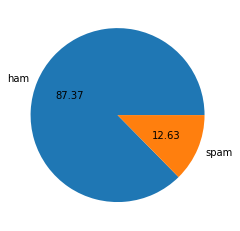

In [18]:
from matplotlib import pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%.2f')
plt.show()

In [19]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
df['num_char'] = df['text'].apply(len)

In [21]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df['num_sents'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [23]:
df.head()

,target,text,num_char,num_words,num_sents
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df[['num_char','num_words','num_sents']].describe()

,num_char,num_words,num_sents
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [25]:
df[df['target'] == 1][['num_char','num_words','num_sents']].describe()

,num_char,num_words,num_sents
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [26]:
df[df['target'] == 0][['num_char','num_words','num_sents']].describe()

,num_char,num_words,num_sents
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [27]:
import seaborn as sns

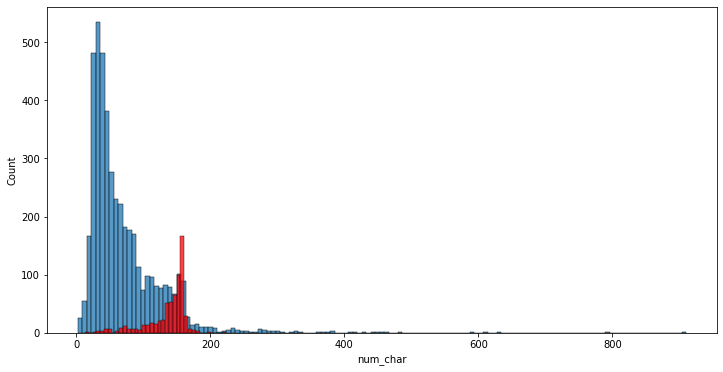

In [28]:
# num_char
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] == 1]['num_char'],color='red')
plt.show()

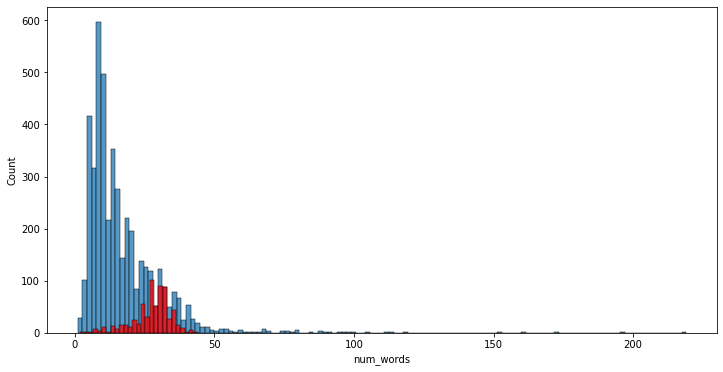

In [29]:
# num_words
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')
plt.show()

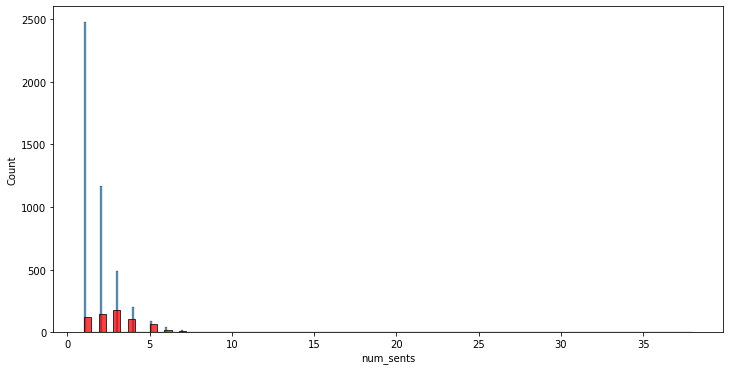

In [30]:
# num_sents
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sents'])
sns.histplot(df[df['target'] == 1]['num_sents'],color='red')
plt.show()

In [31]:
df.corr()

,target,num_char,num_words,num_sents
target,1.000000,0.384717,0.264198,0.267602
num_char,0.384717,1.000000,0.965307,0.626118
num_words,0.264198,0.965307,1.000000,0.683561
num_sents,0.267602,0.626118,0.683561,1.000000


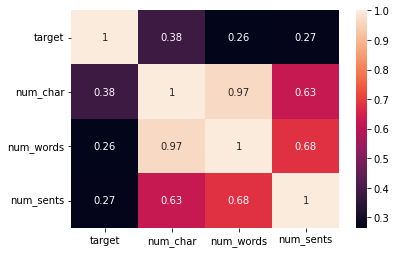

In [32]:
sns.heatmap(df.corr(),annot=True)
plt.show()

## Data preprocessing

In [33]:
# Lower case
# Tokenization
# Remove special characters
# Remove stop words 
# stemming

In [34]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [35]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return ' '.join(y) 

In [36]:
df['transformed_text'] = df['text'].apply(transform_text)

In [37]:
df.head()

,target,text,num_char,num_words,num_sents,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [38]:
from wordcloud import WordCloud

In [39]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [40]:
spam_sms = wc.generate(df[df['target'] ==1]['transformed_text'].str.cat(sep=" "))

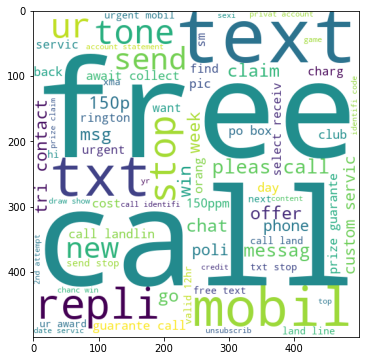

In [41]:
plt.figure(figsize=(12,6))
plt.imshow(spam_sms)
plt.show()

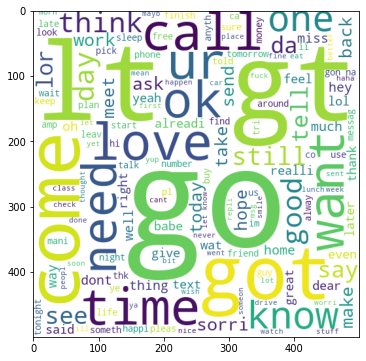

In [42]:
ham_sms = wc.generate(df[df['target'] ==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(ham_sms)
plt.show()

In [43]:
from collections import Counter

In [44]:
corpus_ham = []
for msg in df[df['target'] ==0]['transformed_text'].tolist():
  for word in msg.split():
    corpus_ham.append(word)

In [45]:
# ham most-common 30 words
Counter(corpus_ham).most_common(30)

[('u', 871),
 ('go', 401),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 272),
 ('got', 236),
 ('like', 234),
 ('know', 234),
 ('call', 232),
 ('time', 217),
 ('good', 212),
 ('want', 208),
 ('ok', 207),
 ('love', 206),
 ('ur', 197),
 ('day', 184),
 ('need', 170),
 ('one', 164),
 ('4', 155),
 ('lor', 153),
 ('think', 149),
 ('home', 149),
 ('see', 145),
 ('still', 142),
 ('take', 141),
 ('da', 133),
 ('tell', 133),
 ('make', 129)]

In [46]:
corpus_spam = []
for msg in df[df['target'] ==1]['transformed_text'].tolist():
  for word in msg.split():
    corpus_spam.append(word)

In [47]:
# spam most-common 30 words
Counter(corpus_spam).most_common(30)

[('call', 320),
 ('free', 189),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('prize', 82),
 ('4', 76),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 50),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


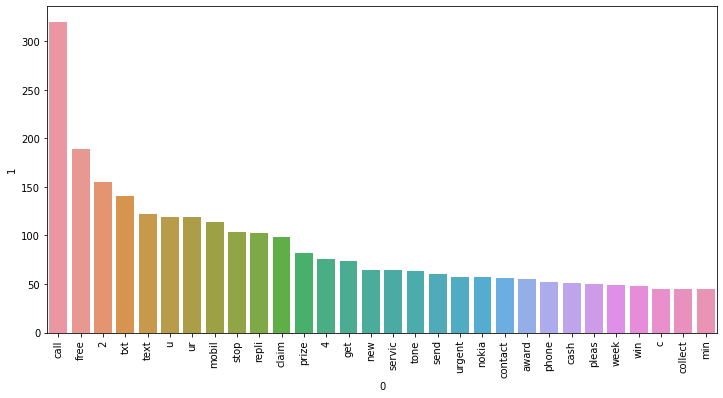

In [48]:
# spam most-common 30 words
df_corpus_spam = pd.DataFrame(Counter(corpus_spam).most_common(30))
plt.figure(figsize=(12,6))
sns.barplot(df_corpus_spam[0],df_corpus_spam[1])
plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


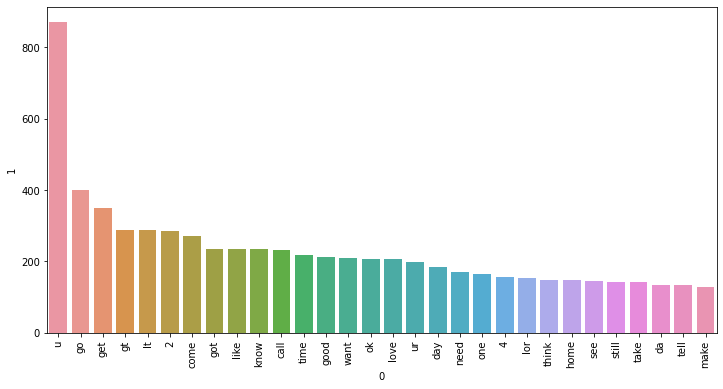

In [49]:
# ham most-common 30 words
df_corpus_ham = pd.DataFrame(Counter(corpus_ham).most_common(30))
plt.figure(figsize=(12,6))
sns.barplot(df_corpus_ham[0],df_corpus_ham[1])
plt.xticks(rotation='vertical')
plt.show()

## Model building

In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [72]:
# cv = CountVectorizer(max_features=3000)
tfidf = TfidfVectorizer(max_features=3000)

In [73]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [74]:
y = df.loc[:,['target']]

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [76]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [77]:
# GaussianNB
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.867504835589942
[[785 111]
 [ 26 112]]
0.5022421524663677


In [78]:
# MultinomialNB
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[896   0]
 [ 28 110]]
1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [79]:
# BernoulliNB
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9816247582205029
[[895   1]
 [ 18 120]]
0.9917355371900827


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
